In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition, metrics
%matplotlib inline

## Generate Swiss Roll
Here we parameterize the swiss roll and generate the data with a bit of noise. We will use the parameter `t` as the length along the sheet.

In [2]:
n = 2000 # Number of points to generate.
noise = 0.1 # Amount of noise.
h = 30 * np.random.rand(n, 1); # Width of the sheet.
t = (3*np.pi/2)*(1 + 2*np.random.rand(n, 1)) # Parameter
X = np.hstack((t*np.cos(t), h, t*np.sin(t))) + noise*np.random.rand(n, 3)

Plot the data we have generated 

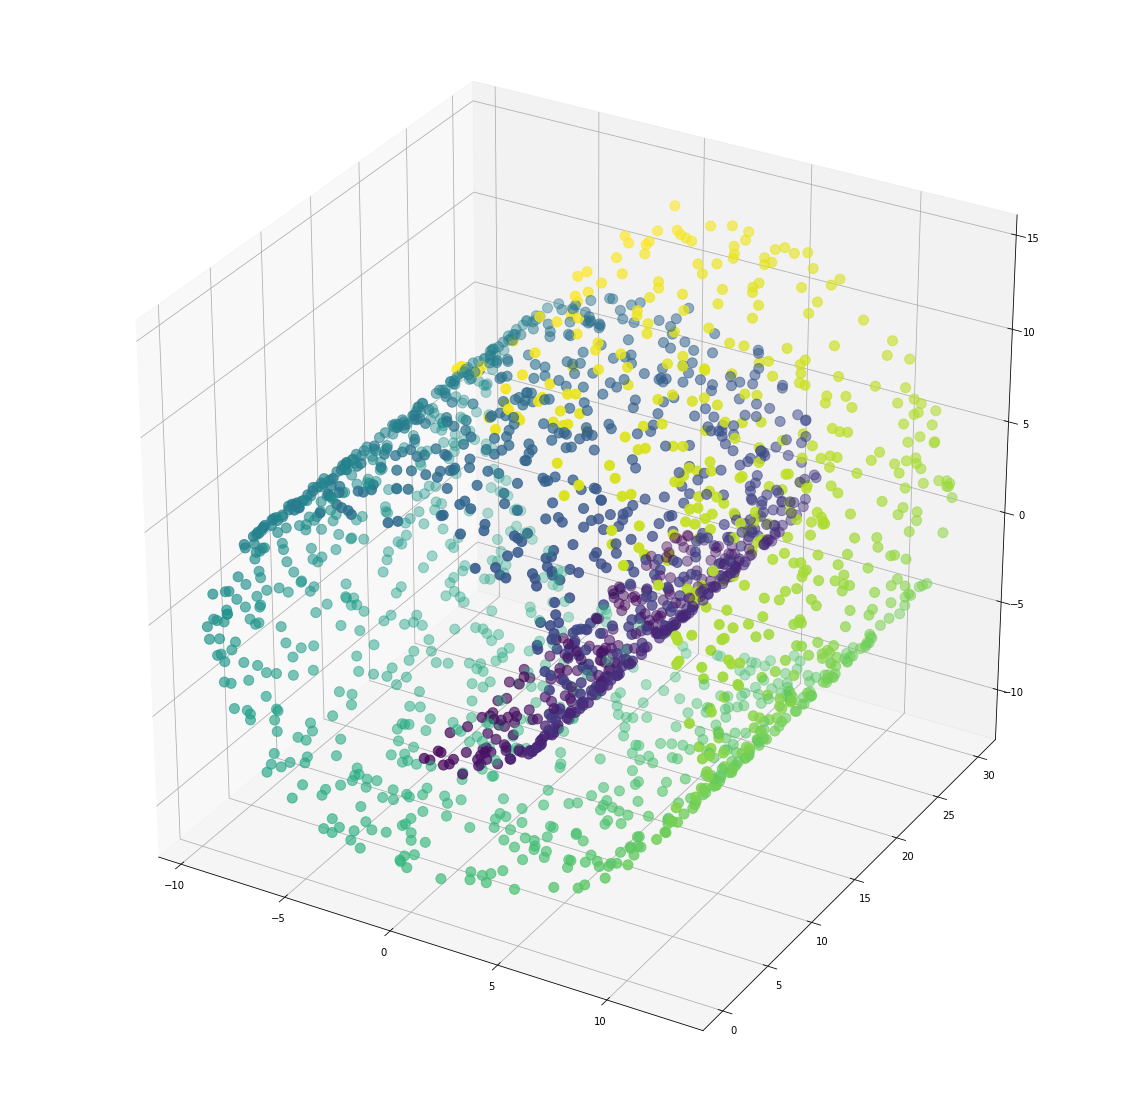

In [3]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=100, c=t)

## Principal Component Analysis
Let's perform PCA on the swiss roll and see what we get. 

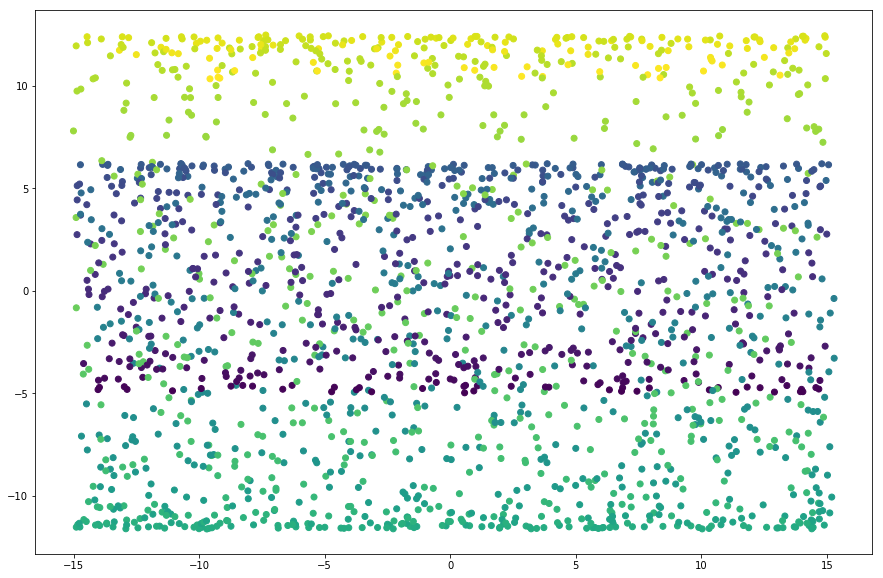

In [4]:
Y = decomposition.PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(15,10))
plt.scatter(Y[:, 0], Y[:, 1], c=t)

PCA is not able to unroll the sheet. This is because PCA is only capable of linear projections of the original data and our sheet is parameterized along a nonlinear path. 

## Diffusion Maps

First let's use the same data set from before and compute the pairwise distances between all points.

In [5]:
d = metrics.euclidean_distances(X)

We can also use the build in `rbf_kernel` function and generate the log-log plot to pick the optimal value of epsilon.

In [6]:
# Values of epsilon in base 2 we want to scan. 
eps = np.power(2., np.arange(-10.,14.,1))

# Pre-allocate array containing sum(Aij). 
Aij = np.zeros(eps.shape)

# Loop through values of epsilon and evaluate matrix sum.
for i in range(len(eps)): 
    A = metrics.pairwise.rbf_kernel(X, gamma=1./(2.*eps[i]))
    Aij[i] = A.sum()

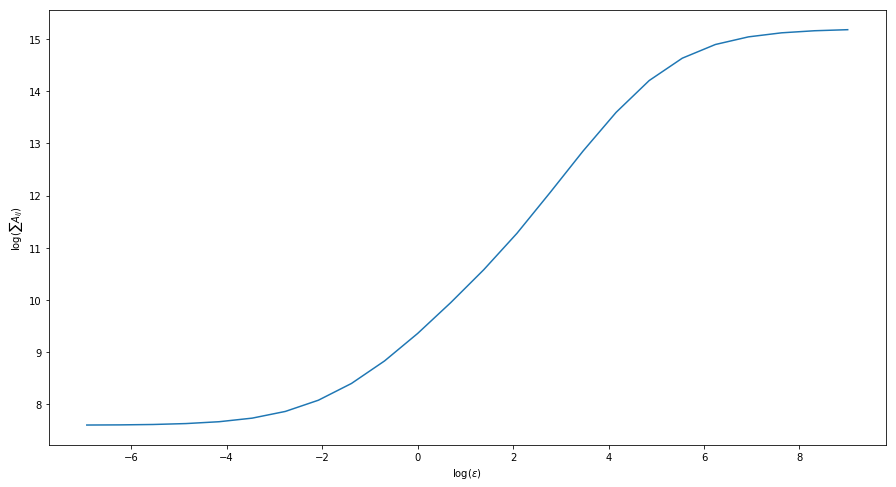

In [7]:
plt.figure(figsize=(15,8))
plt.plot(np.log(eps), np.log(Aij))
plt.xlabel('$\log(\epsilon)$')
plt.ylabel('$\log(\sum{A_{ij}})$')

In [8]:
# From the plot above we see that 4 is a good choice. 
eps = 4.

# Generate final matrix A, and row normalized matrix M. 
A = metrics.pairwise.rbf_kernel(X, gamma=1./(2.*eps))
M = A/A.sum(axis=1, keepdims=True)

# Get the eigenvalues/vectors of M. 
# We normalize by the first eigenvector. 
W, V = np.linalg.eig(M)
V = V/V[:,0]

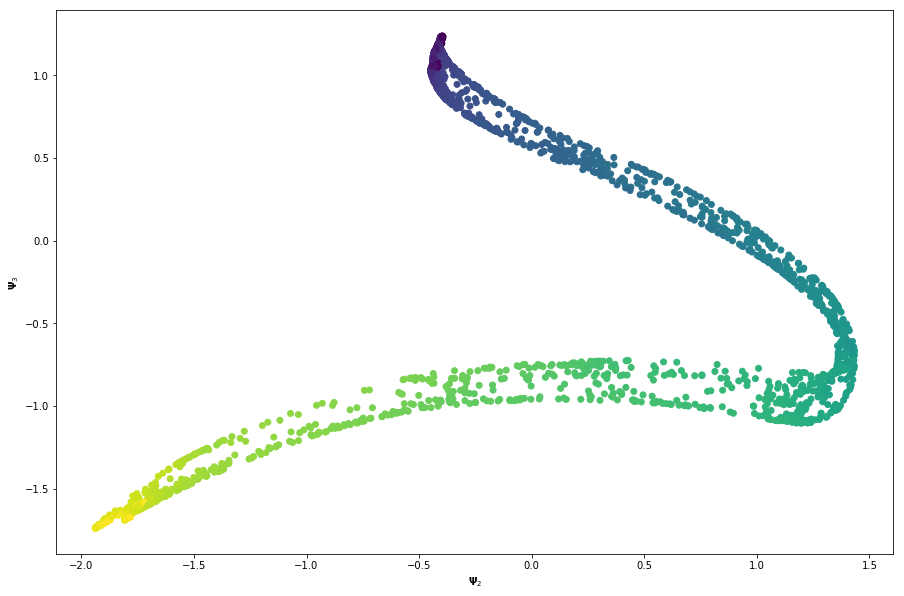

In [9]:
# Plot the 2nd/3rd eigenvectors.
plt.figure(figsize=(15,10))
plt.scatter(V[:, 1], V[:, 2], c=t)
plt.xlabel('$\mathbf{\Psi}_2$')
plt.ylabel('$\mathbf{\Psi}_3$')

The Swiss roll was not properly unwrapped. Perhaps we need to make a more judicious choice for epsilon? Let's loop through and plot the diffusion coordinates for a few different values.# From the plot above we see that 4 is a good choice. 
eps = 4.

# Generate final matrix A, and row normalized matrix M. 
A = metrics.pairwise.rbf_kernel(X, gamma=1./(2.*eps))
M = A/A.sum(axis=1, keepdims=True)

# Get the eigenvalues/vectors of M. 
# We normalize by the first eigenvector. 
W, V = np.linalg.eig(M)
V = V/V[:,0]

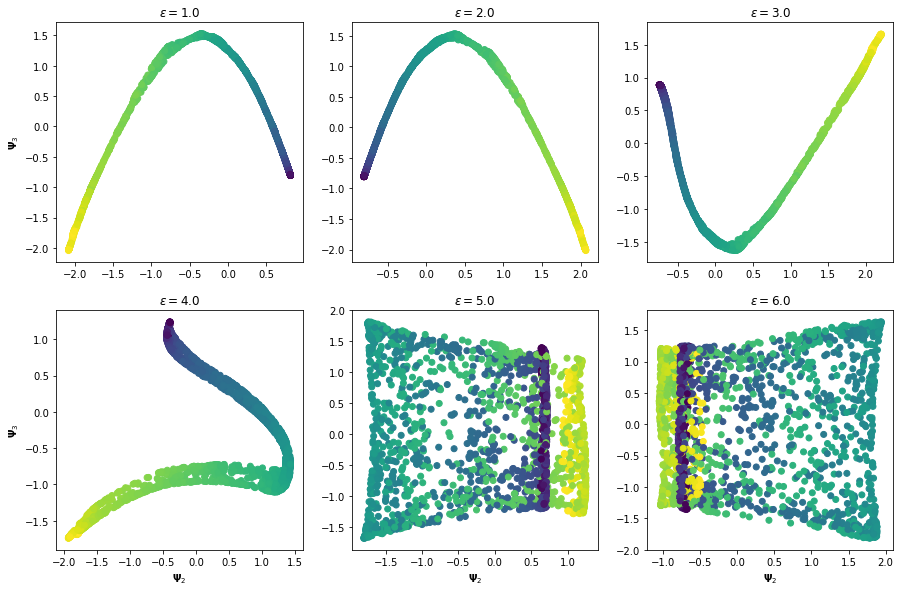

In [10]:
# Generate a series of epsilons. 
eps = np.arange(1., 7., 1)

fig = plt.figure(figsize=(15,15))

for i in range(len(eps)):
    # Generate final matrix A, and row normalized matrix M. 
    A = metrics.pairwise.rbf_kernel(X, gamma=1./(2.*eps[i]))
    M = A/A.sum(axis=1, keepdims=True)

    # Get the eigenvalues/vectors of M. 
    # We normalize by the first eigenvector. 
    W, V = np.linalg.eig(M)
    V = V/V[:,0]
    
    # Subplot
    plt.subplot(3, 3, i+1)
    plt.scatter(V[:, 1], V[:, 2], c=t)
    plt.title('$\epsilon = {0}$'.format(eps[i]))

# Label some axes and show the plot.
plt.subplot(3,3,1)
plt.ylabel('$\mathbf{\Psi}_3$')
plt.subplot(3,3,4)
plt.ylabel('$\mathbf{\Psi}_3$')
plt.xlabel('$\mathbf{\Psi}_2$')
plt.subplot(3,3,5)
plt.xlabel('$\mathbf{\Psi}_2$')
plt.subplot(3,3,6)
plt.xlabel('$\mathbf{\Psi}_2$')
plt.show()

Let's generate a new sheet that's approximately a square and generate the diffusion map# From the plot above we see that 4 is a good choice. 
eps = 4.

# Generate final matrix A, and row normalized matrix M. 
A = metrics.pairwise.rbf_kernel(X, gamma=1./(2.*eps))
M = A/A.sum(axis=1, keepdims=True)

# Get the eigenvalues/vectors of M. 
# We normalize by the first eigenvector. 
W, V = np.linalg.eig(M)
V = V/V[:,0].

In [11]:
h = 50 * np.random.rand(n, 1); # Width of the sheet.
t = (3*np.pi/2)*(1 + 2*np.random.rand(n, 1)) # Parameter
X = np.hstack((t*np.cos(t), h, t*np.sin(t))) + noise*np.random.rand(n, 3)

In [12]:
# Repeat the process using epsilon = 3.
eps = 3.

# Generate final matrix A, and row normalized matrix M. 
A = metrics.pairwise.rbf_kernel(X, gamma=1./(2.*eps))
M = A/A.sum(axis=1, keepdims=True)

# Get the eigenvalues/vectors of M. 
# We normalize by the first eigenvector. 
W, V = np.linalg.eig(M)
V = V/V[:,0]

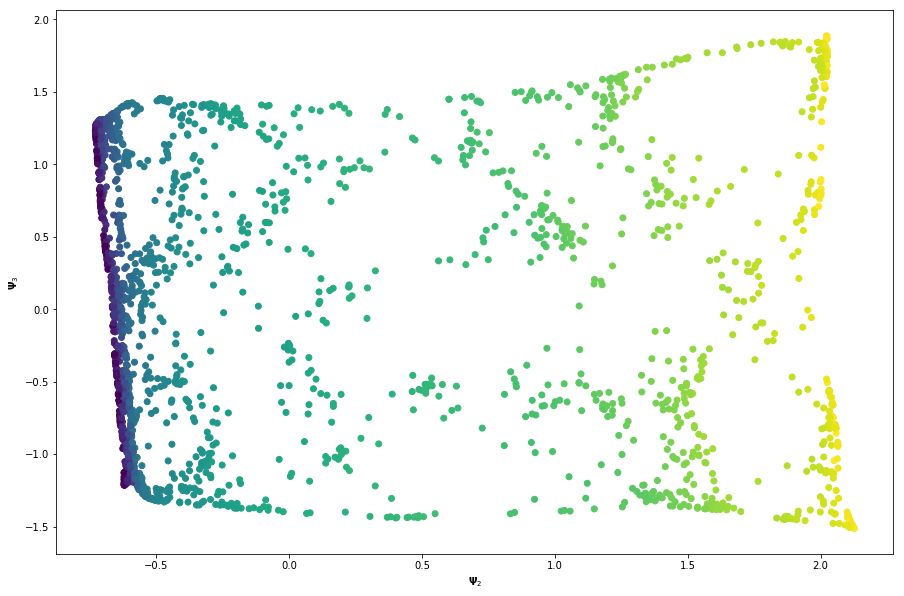

In [13]:
# Plot the 2nd/3rd eigenvectors.
plt.figure(figsize=(15,10))
plt.scatter(V[:, 1], V[:, 2], c=t)
plt.xlabel('$\mathbf{\Psi}_2$')
plt.ylabel('$\mathbf{\Psi}_3$')